# Mini-Project

Import the appropriate libraries for doing mathamatics and visualizations 

In [216]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import scipy.stats
plt.style.use('seaborn')

Define the $U(x)$ function

In [192]:
def U(x):
    Eb = 5 #kbt
    d = 1 # Agnstrom
    return Eb*((x/d)**2-1)**2

Test $U(x)$ function at various ranges to understand its functionality

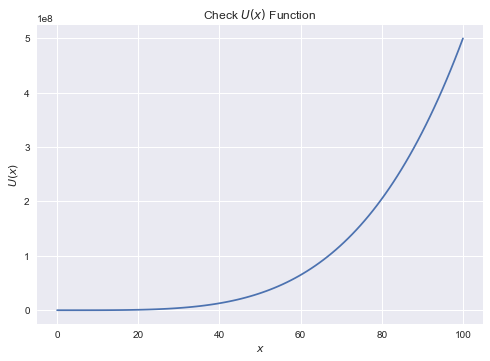

In [228]:
x = np.linspace(.01,100, 100)

y = U(x)

plt.plot(x, y)
plt.title('Check $U(x)$ Function')
plt.xlabel('$x$')
plt.ylabel('$U(x)$');

Define the dampening function according to the Simplified Overdampening/Brownian Function. The initial was defined as

$\frac{dx}{dt} = -\frac{1}{m\gamma}\frac{dU}{dx} + \frac{1}{m\gamma}f_{rand}$, 

where $f_{rand}$ was a random selection from a normal distribution.
In our case, we are simplifying $f_{rand}$ to be a choice between either,

$f_{rand} = \pm \sqrt{2K_{B}T\Delta t / m\gamma}$

When we write this as a step function we have to show the following,

$x_{j+1} = x_{j} - \frac{\Delta t}{m\gamma} \frac{dU}{dx}\Big|_{x_{j}} + \Delta x^{rand}$,

Where $\Delta x^{rand}$ is just  $\frac{1}{m\gamma}f_{rand}$


In [229]:
def dampen(xj, dt):
    m = 10**-9
    gamma = 10**9
    Eb = 5
    Uderivative = sym.diff(U(xj))
    delta_x_rand = np.random.choice([-np.sqrt(2*dt/(m*gamma)), np.sqrt(2*dt/(m*gamma))])
    return xj - (dt/m*gamma) * Uderivative + delta_x_rand
    

We can run a simulation in the following way, where we define the inital x, the step, the change in time for each step.

In [218]:
xj = -1 ## Initial x
steps = 100 ## Number of Steps
dt = 0.001 ## Change in time with each step

## Initialize our potential list
values = [U(xj)]

## Run the simulation for the number of steps-1 (we do this becuase We define the initial just by running U(x) in the list)
for i in range(steps-1):
    xj = dampen(xj, dt)
    potential = U(xj)
    values.append(potential)

## Run the simulation to return just the dampening function

## initialize our r_value list with xj
r_values = [xj]
    
for i in range(steps-1):
    xj = dampen(xj, dt)
    r_values.append(xj)

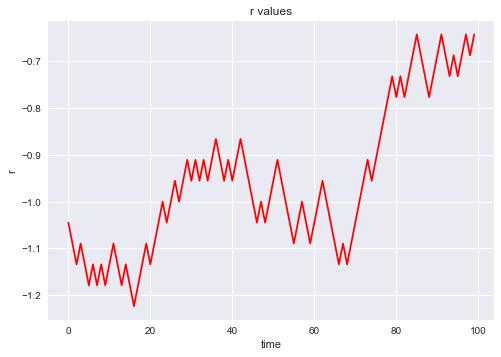

In [222]:
## Plot the r values
plt.plot(range(steps), r_values, '-r')
plt.title('r values')
plt.xlabel('time')
plt.ylabel('r');

In [223]:
## Check the mean of the r values
np.mean(r_values)

-0.956173067641004

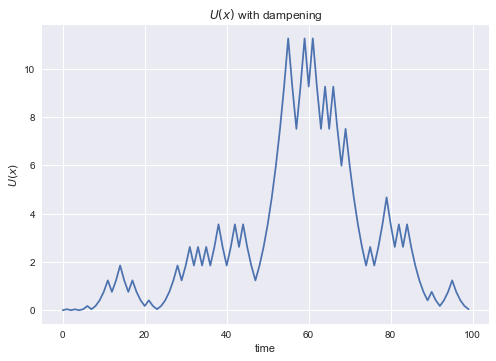

In [224]:
## Plot the Potential Function over time
plt.plot(range(steps), values, '-')
plt.title('$U(x)$ with dampening')
plt.xlabel('time')
plt.ylabel('$U(x)$');

In [225]:
## Check sympy derivative
x, Eb, d = sym.symbols('x E_{b} d')
der = sym.diff(Eb*((x/d)**2-1)**2, x)

der

4*E_{b}*x*(-1 + x**2/d**2)/d**2

In [226]:
## Testing the Random Choice
m = 10**-9
gamma = 10**9
test = [np.random.choice([-np.sqrt(2*dt/(m*gamma)), np.sqrt(2*dt/(m*gamma))]) for dt in range(100)]

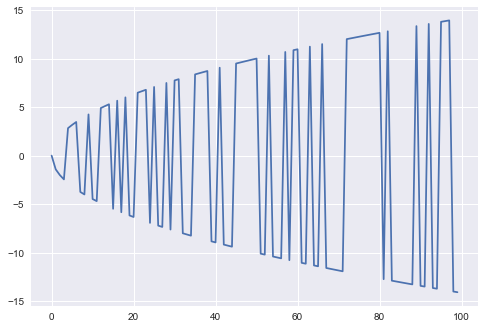

In [227]:
plt.plot(test)